<a href="https://colab.research.google.com/github/nicolasvazquez95/Aprendiendo_DeepLearning/blob/main/01_LR_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 🛠 Exercises

We've a covered a whole lot pretty quickly.

So now it's time to have a **play around** with a few things and start to build up your initution.

I emphasise the words play around because that's very important. Try a few things out, run the code and see what happens.

1. Create your own regression dataset (or make the one we created in "Create data to view and fit" bigger) and build fit a model to it.
2. Try building a neural network with 4 Dense layers and fitting it to your own regression dataset, how does it perform?
3. Try and improve the results we got on the insurance dataset, some things you might want to try include:
  * Building a larger model (how does one with 4 dense layers go?).
  * Increasing the number of units in each layer.
  * Lookup the documentation of [Adam](https://www.tensorflow.org/api_docs/python/tf/keras/optimizers/Adam) and find out what the first parameter is, what happens if you increase it by 10x?
  * What happens if you train for longer (say 300 epochs instead of 200)? 
4. Import the [Boston pricing dataset](https://www.tensorflow.org/api_docs/python/tf/keras/datasets/boston_housing/load_data) from TensorFlow [`tf.keras.datasets`](https://www.tensorflow.org/api_docs/python/tf/keras/datasets) and model it.

In [1]:
#Imports
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## Scikit
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,MinMaxScaler
## Keras
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Sequential

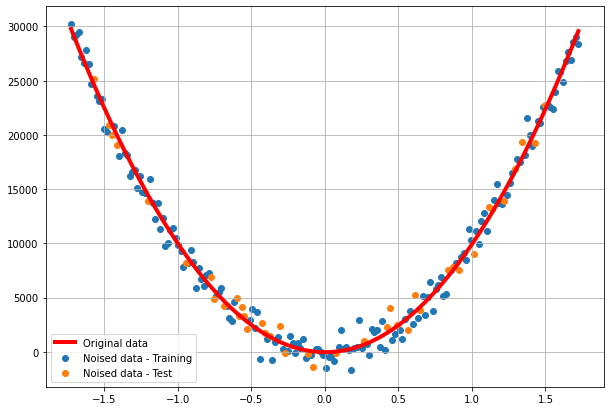

In [2]:
#1
X = np.arange(-100,100,1)
Y = 3*X**2 + 2*X -40
## Add gaussian noise
np.random.seed(42)
noise = np.random.normal(0,1000,len(X))
Y_noised = Y + noise

# Feature scaling
std_scaler = StandardScaler()
X = std_scaler.fit_transform(X.reshape(-1,1))

# Split into train and test set
X_train,X_test,y_train,y_test = train_test_split(X,Y_noised,
                                                 random_state=42,test_size=0.2)


## Convert into tf tensors
X_train = tf.constant(X_train,dtype=tf.float32)
y_train = tf.constant(y_train,dtype=tf.float32)
X_test = tf.constant(X_test,dtype=tf.float32)
y_test = tf.constant(y_test,dtype=tf.float32)

#Plot data
plt.figure(figsize=(10,7))
plt.plot(X,Y,label='Original data',color='red',linewidth=4)
plt.scatter(X_train,y_train,label='Noised data - Training')
plt.scatter(X_test,y_test,label='Noised data - Test')
plt.grid()
plt.legend();

In [3]:
# Set random seed
tf.random.set_seed(42)

# Create a model (same as above)
model = Sequential([
        Dense(200,activation='relu'),
        Dense(100,activation='relu'),
        Dense(1)
])

# Compile model (same as above)
model.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
              metrics=["mae"])

In [4]:
# Fit model (this time we'll train for longer)
history = model.fit(X_train, y_train, epochs=200,verbose=0) 

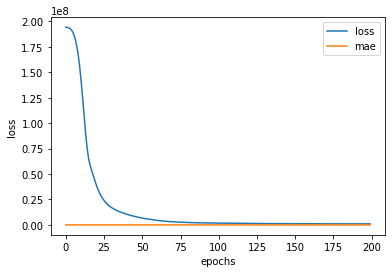

In [5]:
pd.DataFrame(history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs");

In [6]:
model.evaluate(X_test,y_test)

2/2 [==============================] - 0s 20ms/step - loss: 1266935.6250 - mae: 923.9337


[1266935.625, 923.9337158203125]

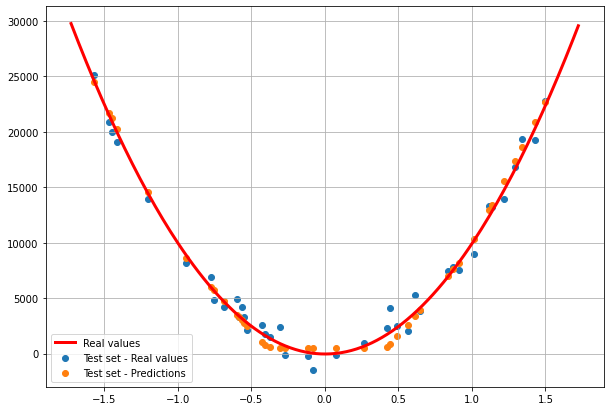

In [7]:
# Visualize predictions and real values
y_pred = model.predict(X_test)

plt.figure(figsize=(10,7))
plt.scatter(X_test,y_test,label='Test set - Real values')
plt.scatter(X_test,y_pred,label='Test set - Predictions')
plt.plot(X,Y,color='red',linewidth=3,label='Real values')
plt.grid()
plt.legend();

In [31]:
# 2
model_2 = Sequential([
        Dense(100,activation='relu'),
        Dense(100,activation='relu'),
        Dense(100,activation='relu'),
        Dense(100,activation='relu'),
        Dense(1)
])

model_2.compile(loss=tf.keras.losses.mse,
              optimizer=tf.keras.optimizers.Adam(learning_rate=1e-2),
              metrics=['mae']
              )
model_2.fit(X_train,y_train,epochs=200)

Epoch 1/200
5/5 [==============================] - 1s 7ms/step - loss: 194213840.0000 - mae: 10503.7656
Epoch 2/200
5/5 [==============================] - 0s 8ms/step - loss: 193150368.0000 - mae: 10467.6582
Epoch 3/200
5/5 [==============================] - 0s 8ms/step - loss: 185606128.0000 - mae: 10224.1738
Epoch 4/200
5/5 [==============================] - 0s 5ms/step - loss: 158336000.0000 - mae: 9323.3545
Epoch 5/200
5/5 [==============================] - 0s 5ms/step - loss: 84673944.0000 - mae: 6855.7148
Epoch 6/200
5/5 [==============================] - 0s 6ms/step - loss: 52718444.0000 - mae: 6411.1626
Epoch 7/200
5/5 [==============================] - 0s 7ms/step - loss: 39038248.0000 - mae: 5585.4209
Epoch 8/200
5/5 [==============================] - 0s 9ms/step - loss: 35804800.0000 - mae: 4882.8228
Epoch 9/200
5/5 [==============================] - 0s 4ms/step - loss: 27730938.0000 - mae: 4450.1689
Epoch 10/200
5/5 [==============================] - 0s 4ms/step - loss: 232

In [33]:
model_2.evaluate(X_test,y_test)

2/2 [==============================] - 0s 7ms/step - loss: 1052569.6250 - mae: 852.2015


[1052569.625, 852.2014770507812]

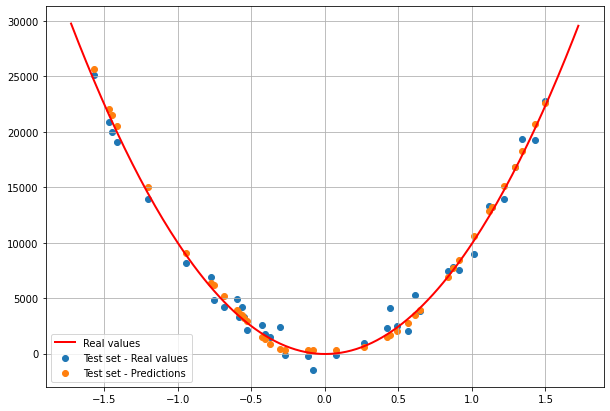

In [34]:
# Visualize predictions and real values
y_pred = model_2.predict(X_test)

plt.figure(figsize=(10,7))
plt.scatter(X_test,y_test,label='Test set - Real values')
plt.scatter(X_test,y_pred,label='Test set - Predictions')
plt.plot(X,Y,color='red',linewidth=2,label='Real values')
plt.grid()
plt.legend();

In [35]:
# 3
# Get dataset
insurance = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")
insurance.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


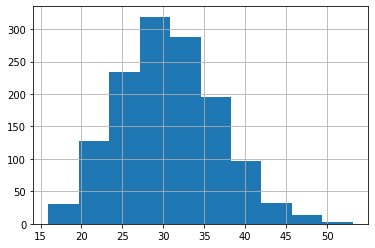

In [39]:
insurance['bmi'].hist()

In [72]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler, OneHotEncoder

col_transf = make_column_transformer(
                                      (MinMaxScaler(),['age','children',]),
                                      (StandardScaler(),['bmi']),# Justificado por el gráfico de arriba bro
                                      (OneHotEncoder(),['sex','smoker','region'])
                                      )
# Make X/y
X = insurance.drop('charges',axis=1)
Y = insurance['charges']

# Transform and split 
X = col_transf.fit_transform(X)
X_train,X_test,y_train,y_test = train_test_split(X,Y,test_size=0.25,random_state=42)

In [98]:
# Build a first model 
ins_model = Sequential([
                        Dense(100,activation='relu'),
                        Dense(100,activation='relu'),
                        Dense(100,activation='relu'),
                        Dense(100,activation='relu'),
                        Dense(1)
])

ins_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['mae']
                  )
ins_history = ins_model.fit(X_train,y_train,epochs=200)

Epoch 1/200
32/32 [==============================] - 2s 4ms/step - loss: 13263.5674 - mae: 13263.5674
Epoch 2/200
32/32 [==============================] - 0s 3ms/step - loss: 13072.2070 - mae: 13072.2070
Epoch 3/200
32/32 [==============================] - 0s 3ms/step - loss: 10593.8535 - mae: 10593.8535
Epoch 4/200
32/32 [==============================] - 0s 4ms/step - loss: 7908.4014 - mae: 7908.4014
Epoch 5/200
32/32 [==============================] - 0s 4ms/step - loss: 7363.8472 - mae: 7363.8472
Epoch 6/200
32/32 [==============================] - 0s 6ms/step - loss: 6693.2754 - mae: 6693.2754
Epoch 7/200
32/32 [==============================] - 0s 6ms/step - loss: 5718.9985 - mae: 5718.9985
Epoch 8/200
32/32 [==============================] - 0s 7ms/step - loss: 4537.8804 - mae: 4537.8804
Epoch 9/200
32/32 [==============================] - 0s 6ms/step - loss: 3901.1782 - mae: 3901.1782
Epoch 10/200
32/32 [==============================] - 0s 4ms/step - loss: 3575.7466 - mae: 357

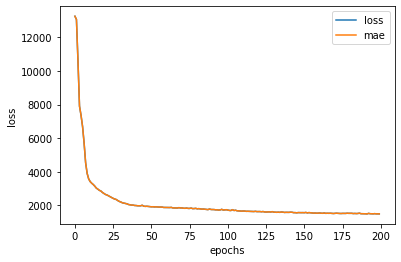

In [99]:
pd.DataFrame(ins_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

In [100]:
ins_model.evaluate(X_test,y_test)

11/11 [==============================] - 1s 3ms/step - loss: 1442.9701 - mae: 1442.9701


[1442.9700927734375, 1442.9700927734375]

In [106]:
# 3 
# Get data
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.boston_housing.load_data(test_split=0.2,seed=42)

In [107]:
# Feature scaling
minmax = MinMaxScaler()
X_train = minmax.fit_transform(X_train)
X_test = minmax.transform(X_test)

In [113]:
# Model fitting
boston_model = Sequential([
                        Dense(200,activation='relu'),
                        Dense(200,activation='relu'),
                        Dense(200,activation='relu'),
                        Dense(200,activation='relu'),
                        Dense(1)
])

boston_model.compile(loss=tf.keras.losses.mae,
                  optimizer=tf.keras.optimizers.Adam(),
                  metrics=['mae']
                  )
boston_history = boston_model.fit(X_train,y_train,epochs=300)

Epoch 1/300
13/13 [==============================] - 1s 4ms/step - loss: 20.6017 - mae: 20.6017
Epoch 2/300
13/13 [==============================] - 0s 6ms/step - loss: 10.1656 - mae: 10.1656
Epoch 3/300
13/13 [==============================] - 0s 5ms/step - loss: 6.4781 - mae: 6.4781
Epoch 4/300
13/13 [==============================] - 0s 6ms/step - loss: 5.0443 - mae: 5.0443
Epoch 5/300
13/13 [==============================] - 0s 5ms/step - loss: 4.4943 - mae: 4.4943
Epoch 6/300
13/13 [==============================] - 0s 6ms/step - loss: 3.9778 - mae: 3.9778
Epoch 7/300
13/13 [==============================] - 0s 5ms/step - loss: 3.6681 - mae: 3.6681
Epoch 8/300
13/13 [==============================] - 0s 6ms/step - loss: 3.4237 - mae: 3.4237
Epoch 9/300
13/13 [==============================] - 0s 7ms/step - loss: 3.0559 - mae: 3.0559
Epoch 10/300
13/13 [==============================] - 0s 4ms/step - loss: 2.8456 - mae: 2.8456
Epoch 11/300
13/13 [==============================] - 0

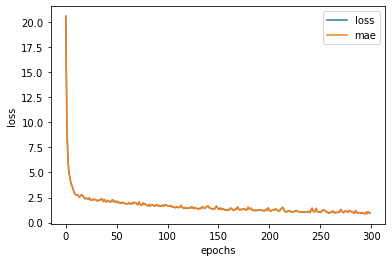

In [114]:
pd.DataFrame(boston_history.history).plot()
plt.ylabel("loss")
plt.xlabel("epochs"); # note: epochs will only show 100 since we overrid the history variable

In [115]:
boston_model.evaluate(X_test,y_test)

4/4 [==============================] - 0s 3ms/step - loss: 1.9579 - mae: 1.9579


[1.9579089879989624, 1.9579089879989624]